In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
arr = np.array([[1, 2, np.nan], [np.nan, 3, 4]])
dframe1 = DataFrame(arr, 
                                       index=list('AB'),
                                       columns = ['One', 'Two', 'Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [4]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [5]:
dframe1.sum(axis = 1)

A    3.0
B    7.0
dtype: float64

In [6]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [7]:
dframe1.min(axis = 1)

A    1.0
B    3.0
dtype: float64

In [12]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [13]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [14]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [15]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [16]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [17]:
import pickle

with open('stock_price_lec22.pkl', 'br') as f:
    CVX, XOM, BP =pickle.load(f)

<_io.BufferedReader name='stock_price_lec22.pkl'>

In [19]:
CVX

,close,high,low,open,volume,adjClose
date,,,,,,
2010-01-04 00:00:00+00:00,79.06,79.200,78.160,78.20,10173800,46.843021
2010-01-05 00:00:00+00:00,79.62,79.620,78.720,79.22,10593700,47.174820
2010-01-06 00:00:00+00:00,79.63,80.000,79.190,79.44,11014600,47.180745
2010-01-07 00:00:00+00:00,79.33,79.700,78.970,79.36,9626900,47.002996
2010-01-08 00:00:00+00:00,79.47,79.470,78.890,79.12,5624300,47.085945
...,...,...,...,...,...,...
2012-12-24 00:00:00+00:00,108.63,109.390,108.480,109.30,2284400,71.208760
2012-12-26 00:00:00+00:00,108.46,109.270,108.206,109.10,4094300,71.097323
2012-12-27 00:00:00+00:00,108.52,108.860,107.270,108.46,5525700,71.136654


In [24]:
prices = pd.DataFrame({'CVX': CVX['adjClose'],
                                            'XOM': XOM['adjClose'],
                                            'BP': BP['adjClose']})
prices

,CVX,XOM,BP
date,,,
2010-01-04 00:00:00+00:00,46.843021,41.611767,28.928607
2010-01-05 00:00:00+00:00,47.174820,41.774243,29.134018
2010-01-06 00:00:00+00:00,47.180745,42.135299,29.285630
2010-01-07 00:00:00+00:00,47.002996,42.002912,29.275848
2010-01-08 00:00:00+00:00,47.085945,41.834419,29.344319
...,...,...,...
2012-12-24 00:00:00+00:00,71.208760,56.426171,22.920791
2012-12-26 00:00:00+00:00,71.097323,56.523547,22.898815
2012-12-27 00:00:00+00:00,71.136654,56.387220,22.865852


In [25]:
rets = prices.pct_change()

In [26]:
rets.head()

,CVX,XOM,BP
date,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.007083,0.003905,0.007101
2010-01-06 00:00:00+00:00,0.000126,0.008643,0.005204
2010-01-07 00:00:00+00:00,-0.003767,-0.003142,-0.000334
2010-01-08 00:00:00+00:00,0.001765,-0.004011,0.002339


<Axes: xlabel='date'>

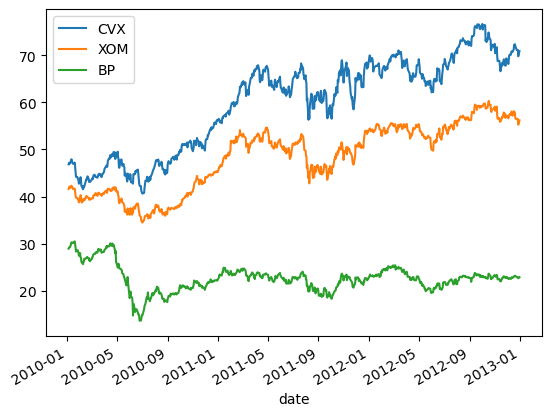

In [27]:
prices.plot()

In [28]:
rets.corr()

,CVX,XOM,BP
CVX,1.00000,0.852500,0.586930
XOM,0.85250,1.000000,0.616568
BP,0.58693,0.616568,1.000000


<Axes: >

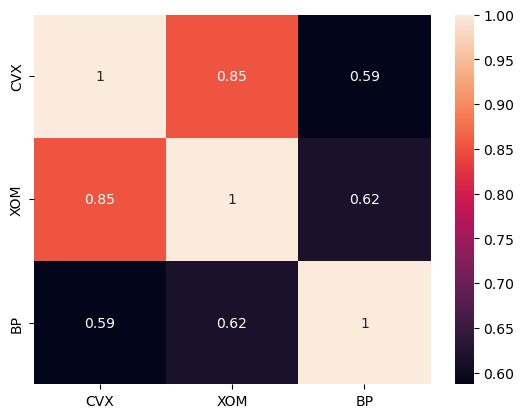

In [29]:
import seaborn as sns

sns.heatmap(rets.corr(),annot=True)

In [30]:
ser1 = Series(['w','w','x','y'])

In [31]:
ser1

0    w
1    w
2    x
3    y
dtype: object

In [33]:
ser1.unique()

array(['w', 'x', 'y'], dtype=object)

In [34]:
ser1.value_counts()

w    2
x    1
y    1
Name: count, dtype: int64